In [7]:
import pandas as pd
from scipy.stats import ttest_ind

# Load the data
data = pd.read_csv('End_dataframe.csv')

# Group by Participant_ID and aggregate data
aggregated_data = data.groupby('ID').agg({
    'Gender': 'first',  # Assume gender is constant for each participant
    'Age': 'first',     # Assume age is constant for each participant
    'VVR_Encoded': 'max'  # If either row has high VVR, classify as high
}).reset_index()

# Separate groups based on aggregated vasovagal reactions (0 = low, 1 = high)
low_vvr_group = aggregated_data[aggregated_data['VVR_Encoded'] == 0]
high_vvr_group = aggregated_data[aggregated_data['VVR_Encoded'] == 1]

# Separate gender groups
male_group = aggregated_data[aggregated_data['Gender'] == 1]
female_group = aggregated_data[aggregated_data['Gender'] == 2]

# Perform t-test for Gender (Male/Female)
ttest_male = ttest_ind(
    male_group[male_group['VVR_Encoded'] == 0]['Age'],
    male_group[male_group['VVR_Encoded'] == 1]['Age'],
    equal_var=False  # Use Welch's t-test if variance is unequal
)
ttest_female = ttest_ind(
    female_group[female_group['VVR_Encoded'] == 0]['Age'],
    female_group[female_group['VVR_Encoded'] == 1]['Age'],
    equal_var=False
)

# Perform t-test for Age (Low VVR vs. High VVR)
ttest_age = ttest_ind(
    low_vvr_group['Age'],
    high_vvr_group['Age'],
    equal_var=False
)

# Print the t-test results
print('T-Test for Gender (Male) - Low VVR vs. High VVR:')
print("T-Statistic:", ttest_male.statistic)

print('\nT-Test for Gender (Female) - Low VVR vs. High VVR:')
print('T-Statistic:', ttest_female.statistic)

print('\nT-Test for Age - Low VVR vs. High VVR:')
print('T-Statistic:', ttest_age.statistic)


T-Test for Gender (Male) - Low VVR vs. High VVR:
T-Statistic: 2.023768651135634

T-Test for Gender (Female) - Low VVR vs. High VVR:
T-Statistic: 1.1488082011486989

T-Test for Age - Low VVR vs. High VVR:
T-Statistic: 2.0090514532447483


In [9]:
import pandas as pd
from scipy import stats

# Read the data from CSV file
data = pd.read_csv('End_dataframe.csv')

# Group by Participant_ID to ensure unique participants
aggregated_data = data.groupby('ID').agg({
    'Prior_Donation': 'first',  # Assume prior donation status is constant for a participant
    'VVR_Encoded': 'max'       # Assume any high VVR classifies as high for a participant
}).reset_index()

# Separate data for low VVR and high VVR groups based on 'Prior_Donation'
low_vvr_data = aggregated_data[aggregated_data['Prior_Donation'] == 1]['VVR_Encoded']
high_vvr_data = aggregated_data[aggregated_data['Prior_Donation'] == 2]['VVR_Encoded']

# Calculate standard deviation for low VVR and high VVR
low_vvr_sd = low_vvr_data.std()
high_vvr_sd = high_vvr_data.std()

# Perform t-test for independent samples
t_statistic, p_value = stats.ttest_ind(low_vvr_data, high_vvr_data, equal_var=False)  # Welch's t-test

# Print the results
print('Standard Deviation (Low VVR):', low_vvr_sd)
print('Standard Deviation (High VVR):', high_vvr_sd)
print('T-Statistic:', t_statistic)


Standard Deviation (Low VVR): 0.3275031320440732
Standard Deviation (High VVR): 0.5017567482042767
T-Statistic: -4.814929202261541


In [2]:
import pandas as pd

# Load the data
data = pd.read_csv("End_dataframe.csv")

# Group by Participant_ID and aggregate Gender and VVR_Encoded
unique_participants = data.groupby("ID").agg({
    "Gender": "first",  # Assuming gender is constant for each participant
    "VVR_Encoded": "max"  # Assuming we want to count if they ever had a high VVR
}).reset_index()

# Compute counts
male_low_vvr_count = len(unique_participants[(unique_participants["Gender"] == 1) & (unique_participants["VVR_Encoded"] == 0)])
male_high_vvr_count = len(unique_participants[(unique_participants["Gender"] == 1) & (unique_participants["VVR_Encoded"] == 1)])

print("Count for Male (1) with Low VVR (0):", male_low_vvr_count)
print("Count for Male (1) with High VVR (1):", male_high_vvr_count)


Count for Male (1) with Low VVR (0): 103
Count for Male (1) with High VVR (1): 29


In [1]:
import pandas as pd

# Read the data
data = pd.read_csv("End_dataframe.csv")

# Group by Participant_ID and aggregate Gender and VVR_Encoded
aggregated_data = data.groupby("ID").agg({
    "Gender": "first",  # Assuming gender is constant for each participant
    "VVR_Encoded": "max"  # Assuming we want to count if they ever had a high VVR
}).reset_index()

# Compute counts for unique participants
female_low_vvr_count = len(aggregated_data[(aggregated_data["Gender"] == 2) & (aggregated_data["VVR_Encoded"] == 0)])
female_high_vvr_count = len(aggregated_data[(aggregated_data["Gender"] == 2) & (aggregated_data["VVR_Encoded"] == 1)])

# Print the results
print("Count for Female (2) with Low VVR (0):", female_low_vvr_count)
print("Count for Female (2) with High VVR (1):", female_high_vvr_count)


/opt/conda/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


Count for Female (2) with Low VVR (0): 126
Count for Female (2) with High VVR (1): 64


In [16]:
Age_low_vvr_mean = np.mean(data[data["VVR_Encoded"] == 0]["Age"])
Age_low_vvr_std = np.std(data[data["VVR_Encoded"] == 0]["Age"])

Age_high_vvr_mean = np.mean(data[data["VVR_Encoded"] == 1]["Age"])
Age_high_vvr_std = np.std(data[data["VVR_Encoded"] == 1]["Age"])

print("Mean (M) of Age for Low VVR (0):", Age_low_vvr_mean)
print("Standard Deviation (SD) of Age for Low VVR (0):", Age_low_vvr_std)
print("Mean (M) of Age for High VVR (1):", Age_high_vvr_mean)
print("Standard Deviation (SD) of Age for High VVR (1):", Age_high_vvr_std)

Mean (M) of Age for Low VVR (0): 37.12719298245614
Standard Deviation (SD) of Age for Low VVR (0): 13.597166791366186
Mean (M) of Age for High VVR (1): 33.83870967741935
Standard Deviation (SD) of Age for High VVR (1): 13.384544386814012


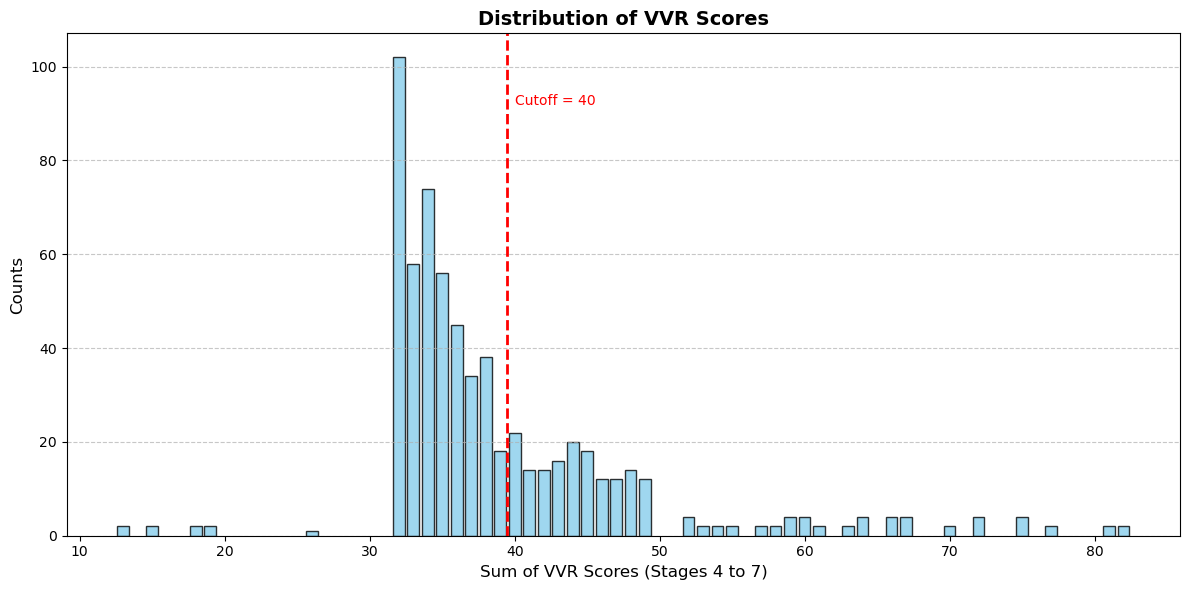

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

vasovagal = data["VVR_sum"]

# Calculate the counts for each VVR score
score_counts = vasovagal.value_counts().sort_index()

# Create the bar graph with improved styling
plt.figure(figsize=(12, 6))  # Adjust the figure size
plt.bar(score_counts.index, score_counts.values, align='center', color='skyblue', edgecolor='black', alpha=0.8)
plt.xlabel("Sum of VVR Scores (Stages 4 to 7)", fontsize=12)
plt.ylabel("Counts", fontsize=12)
plt.title("Distribution of VVR Scores", fontsize=14, fontweight='bold')

# Add a vertical line at the cutoff with annotation
cutoff = 40
plt.axvline(x=cutoff - 0.5, color='red', linestyle='--', linewidth=2)
plt.text(cutoff, max(score_counts.values) * 0.9, 'Cutoff = 40', color='red', fontsize=10, rotation=0)

# Customize the grid and ticks
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.yticks(fontsize=10)

# Save the graph to a PDF
plt.tight_layout()  # Ensures everything fits within the figure
plt.savefig("VVR_Score_Distribution.pdf", bbox_inches='tight')

# Display the graph
plt.show()
